In [12]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split

from sklearn import pipeline      # Pipeline
from sklearn import preprocessing # OrdinalEncoder, LabelEncoder
from sklearn import impute
from sklearn import compose
from sklearn import model_selection # train_test_split
from sklearn import metrics         # accuracy_score, balanced_accuracy_score, plot_confusion_matrix
from sklearn import set_config

from sklearn.tree          import DecisionTreeClassifier
from sklearn.ensemble      import RandomForestClassifier
from sklearn.ensemble      import ExtraTreesClassifier
from sklearn.ensemble      import AdaBoostClassifier
from sklearn.ensemble      import GradientBoostingClassifier
from xgboost               import XGBClassifier
from lightgbm              import LGBMClassifier
from catboost              import CatBoostClassifier
from sklearn.linear_model  import LogisticRegression

In [13]:
data_heart = pd.read_csv('heart.csv')
data_heart.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [14]:
data_saturation = pd.read_csv('o2Saturation.csv')
data_saturation.shape

(3585, 1)

In [15]:
x_variables = ['age', 'sex', 'cp',	'trtbps',	'chol',	'fbs', 'restecg',	'thalachh',	'exng',	'oldpeak',	'slp',	'caa',	'thall']
y_variable  = 'output'

In [16]:
X = data_heart[x_variables]
y = data_heart[y_variable]
y.unique()

array([1, 0], dtype=int64)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

In [9]:

# params_decision_tree = { 'kernel' : ['linear', 'rbf'],        'C': np.arange(1, 10, 1) }



In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_DecisionTree  = {'max_depth'   : [3, 4, 5, 6, 7, 8, 9]}
param_ExtraTree     = {'n_estimators': [0.1, 1, 10, 100, 100, 1000],     'max_depth'     : [3, 4, 5, 6, 7, 8, 9]}
param_RandomForest  = {'n_estimators': [0.1, 1, 10, 100, 100, 1000],     'max_depth'     : [3, 4, 5, 6, 7, 8, 9]}
param_AdaBoost      = {'n_estimators': [0.1, 1, 10, 100, 100, 1000],     'learning_rate' : [0.01, 0.1, 1, 10, 100, 1000]}
param_SklGBM        = {'n_estimators': [0.1, 1, 10, 100, 100, 1000],     'learning_rate' : [0.01, 0.1, 1, 10, 100, 1000]}
param_XGBoost       = {'booster'     : ['gbtree', 'gblinear'],           'eta'           : [0.01, 0.1, 1, 10, 100, 1000] }
param_LightGBM      = {'n_estimators': [0.01, 0.1, 1, 10, 100, 1000],    'learning_rate' : [0.01, 0.1, 1, 10, 100, 1000]}
param_LogisticRegr  = {'C'           : [0.01, 0.1, 1, 10, 100, 1000],    'max_iter'      : [10, 50, 100, 150, 200, 1000]}
param_SVC           = {'kernel'      : ['linear', 'rbf'],                  'C'           : [0.01, 0.1, 1, 10, 100, 1000]}      # 'gamma'         : [0.001, 0.01, 0.1, 1, 10, 100, 1000] ,      


grid_search_DecisionTree      = GridSearchCV(DecisionTreeClassifier(), param_DecisionTree, cv=5)
grid_search_ExtraTree         = GridSearchCV(ExtraTreesClassifier(), param_ExtraTree, cv=5)
grid_search_RandomForest      = GridSearchCV(RandomForestClassifier(), param_RandomForest, cv=5)
grid_search_AdaBoost          = GridSearchCV(AdaBoostClassifier(), param_AdaBoost, cv=5)
grid_search_SklGBM            = GridSearchCV(GradientBoostingClassifier(), param_SklGBM, cv=5)
grid_search_XGBoost           = GridSearchCV(XGBClassifier(), param_XGBoost, cv=5)
grid_search_LightGBM          = GridSearchCV(LGBMClassifier(), param_LightGBM, cv=5)
grid_search_LogisticRegr      = GridSearchCV(LogisticRegression(), param_LogisticRegr, cv=5)
grid_search_SVC               = GridSearchCV(SVC(), param_SVC, cv=5)



In [19]:
grid_search_DecisionTree.fit(X_train, y_train)
grid_search_ExtraTree.fit(X_train, y_train)
grid_search_RandomForest.fit(X_train, y_train)
grid_search_AdaBoost.fit(X_train, y_train)
grid_search_SklGBM.fit(X_train, y_train)
grid_search_XGBoost.fit(X_train, y_train)
grid_search_LightGBM.fit(X_train, y_train)
grid_search_LogisticRegr.fit(X_train, y_train)
grid_search_SVC.fit(X_train, y_train)


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
35 fits failed out of a total of 210.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\sklearn\ensemble\_forest.py", line 392, in fit
    self._validate_estimator()
  File "C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\sklearn\ensemble\_base.py", line 131, in _validate_estimator
    raise ValueError(
ValueError: n_

[20:42:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:20] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:21] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:22] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:23] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: 

[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:42:25] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\lightgbm\sklearn.py", line 967, in fit
    super().fit(X, _y, sample_weight=sample_weight, init_score=init_score, eval_set=valid_sets,
  File "C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\lightgbm\sklearn.py", line 748, in fit
 

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['linear', 'rbf']})

In [21]:
print(f'Decision Tree    =>    Best Score : {round(grid_search_DecisionTree.best_score_ * 100, 2)}    Best Parameters :   {grid_search_DecisionTree.best_params_}  ')
print(f'Extra Trees      =>    Best Score : {round(grid_search_ExtraTree.best_score_ * 100, 2)}    Best Parameters :   {grid_search_ExtraTree.best_params_}  ')
print(f'Random Forest    =>    Best Score : {round(grid_search_RandomForest.best_score_ * 100, 2)}    Best Parameters :   {grid_search_RandomForest.best_params_}  ')
print(f'AdaBoost         =>    Best Score : {round(grid_search_AdaBoost.best_score_ * 100, 2)}    Best Parameters :   {grid_search_AdaBoost.best_params_}  ')
print(f'Skl GBM          =>    Best Score : {round(grid_search_SklGBM.best_score_ * 100, 2)}    Best Parameters :   {grid_search_SklGBM.best_params_}  ')
print(f'XGBoost          =>    Best Score : {round(grid_search_XGBoost.best_score_ * 100, 2)}    Best Parameters :   {grid_search_XGBoost.best_params_}  ')
print(f'LightGBM         =>    Best Score : {round(grid_search_LightGBM.best_score_ * 100, 2)}    Best Parameters :   {grid_search_LightGBM.best_params_}  ')
print(f'LogisticRegr     =>    Best Score : {round(grid_search_LogisticRegr.best_score_ * 100, 2)}    Best Parameters :   {grid_search_LogisticRegr.best_params_}  ')
print(f'SVC              =>    Best Score : {round(grid_search_SVC.best_score_ * 100, 2)}    Best Parameters :   {grid_search_SVC.best_params_}  ')



Decision Tree    =>    Best Score : 77.57    Best Parameters :   {'max_depth': 6}  
Extra Trees      =>    Best Score : 85.04    Best Parameters :   {'max_depth': 5, 'n_estimators': 1000}  
Random Forest    =>    Best Score : 83.73    Best Parameters :   {'max_depth': 4, 'n_estimators': 100}  
AdaBoost         =>    Best Score : 82.39    Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 1000}  
Skl GBM          =>    Best Score : 79.3    Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 100}  
XGBoost          =>    Best Score : 82.85    Best Parameters :   {'booster': 'gblinear', 'eta': 0.1}  
LightGBM         =>    Best Score : 83.28    Best Parameters :   {'learning_rate': 0.1, 'n_estimators': 10}  
LogisticRegr     =>    Best Score : 82.85    Best Parameters :   {'C': 10, 'max_iter': 150}  
SVC              =>    Best Score : 81.96    Best Parameters :   {'C': 0.1, 'kernel': 'linear'}  


In [13]:
"""
Decision Tree    =>    Best Score : 77.57    Best Parameters :   {'max_depth': 6}  
Extra Trees      =>    Best Score : 85.04    Best Parameters :   {'max_depth': 5, 'n_estimators': 1000}  
Random Forest    =>    Best Score : 83.73    Best Parameters :   {'max_depth': 4, 'n_estimators': 100}  
AdaBoost         =>    Best Score : 82.39    Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 1000}  
Skl GBM          =>    Best Score : 79.30    Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 100}  
XGBoost          =>    Best Score : 82.85    Best Parameters :   {'booster': 'gblinear', 'eta': 0.1}  
LightGBM         =>    Best Score : 83.28    Best Parameters :   {'learning_rate': 0.1, 'n_estimators': 10}  
LogisticRegr     =>    Best Score : 82.85    Best Parameters :   {'C': 10, 'max_iter': 150}  
SVC              =>    Best Score : 81.96    Best Parameters :   {'C': 0.1, 'kernel': 'linear'} 

"""


"\n\nDecision Tree    =>    Best Score : 74.85    Best Parameters :   {'max_depth': 3}  \nExtra Trees      =>    Best Score : 84.55    Best Parameters :   {'max_depth': 3, 'n_estimators': 10}  \nRandom Forest    =>    Best Score : 82.79    Best Parameters :   {'max_depth': 4, 'n_estimators': 100}  \nAdaBoost         =>    Best Score : 84.1     Best Parameters :   {'learning_rate': 0.01, 'n_estimators': 1000} \nSkl GBM          =>    Best Score : 80.59    Best Parameters :   {'learning_rate': 1, 'n_estimators': 1000}  \nXGBoost          =>    Best Score : 83.68    Best Parameters :   {'booster': 'gblinear', 'eta': 1}  \nLightGBM         =>    Best Score : 81.47    Best Parameters :   {'learning_rate': 1, 'n_estimators': 10}\n\nLogisticRegr     =>    Best Score : 83.28    Best Parameters :   {'C': 0.1, 'max_iter': 200}  \n\n\n"

In [14]:
#   "Decision Tree":  DecisionTreeClassifier(max_depth=4, random_state=15),
#   "Extra Trees":    ExtraTreesClassifier(n_estimators=100, random_state=15),
#   "Random Forest":  RandomForestClassifier(n_estimators=100, random_state=15),
#   "AdaBoost":       AdaBoostClassifier(n_estimators=100, random_state=15),
#   "Skl GBM":        GradientBoostingClassifier(n_estimators=100, random_state=15),
#   "XGBoost":        XGBClassifier(n_estimators=100, random_state=15),
#   "LightGBM":       LGBMClassifier(n_estimators=100, random_state=15),
#   "CatBoost":       CatBoostClassifier(n_estimators=100, random_state=15),
#   'LogisticRegr':   LogisticRegression(random_state=15),
#   'SVC' :           SVC(C=10, gamma=0.001)

In [15]:
# print('Decision Tree Train Accuracy :  ', round(tree.score(X_train, y_train) * 100, 2))
# print('Decision Tree Test  Accuracy :  ', round(tree.score(X_test, y_test) * 100, 2))
# print()
# print('Random Forest Train Accuracy :  ', round(rand.score(X_train, y_train) * 100, 2))
# print('Random Forest Test  Accuracy :  ', round(rand.score(X_test, y_test) * 100, 2))
# print()
# print('Logistic Regression Train Accuracy :  ', round(logic.score(X_train, y_train) * 100, 2))
# print('Logistic Regression Test Accuracy :  ', round(logic.score(X_test, y_test) * 100, 2))

In [16]:
# tree_classifiers = {
  
#   "Decision Tree":  DecisionTreeClassifier(max_depth=4),
#   "Extra Trees":    ExtraTreesClassifier(n_estimators=100),
#   "Random Forest":  RandomForestClassifier(n_estimators=100),
#   "AdaBoost":       AdaBoostClassifier(n_estimators=100),
#   "Skl GBM":        GradientBoostingClassifier(n_estimators=100),
#   "XGBoost":        XGBClassifier(n_estimators=100, random_state=15),
#   "LightGBM":       LGBMClassifier(n_estimators=100, random_state=15),
#   "CatBoost":       CatBoostClassifier(n_estimators=100, random_state=15),
#   'LogisticRegr':   LogisticRegression(random_state=15),
#   'SVC' :           SVC(C=10, gamma=0.001)
# }

In [17]:
# tree_classifiers = {name: pipeline.make_pipeline(tree_prepro, model) for name, model in tree_classifiers.items()}

# results = pd.DataFrame({'Model': [], 'MSE': [], 'MAB': [], 'Time': []})



In [ ]:
# import time
# for model_name, model in tree_classifiers.items():
    
#     start_time = time.time()
#     model.fit(X_train, y_train)
#     total_time = time.time() - start_time
        
#     pred = model.predict(X_test)
    
#     rang = abs(y_train.max()) - abs(y_train.min())

#     results = results.append({"Model":          model_name,
#                               "MSE":            metrics.mean_squared_error(y_test, pred),
#                               "MAB":            metrics.mean_absolute_error(y_test, pred),
#                               " % error":       metrics.mean_squared_error(y_test, pred) / rang,
#                               "Accuracy Score": model.score(X_test,y_test),
#                               "Time":           total_time},
#                               ignore_index=True)



In [23]:
# results_ord = results.sort_values(by=['Accuracy Score'], ascending=False, ignore_index=True)
# results_ord.index += 1 
# results_ord.style.bar(subset=['MSE', 'MAB'], vmin=0, vmax=100, color='#5fba7d')

,Model,MSE,MAB,Time,% error,Accuracy Score
1,LogisticRegr,0.118421,0.118421,0.033905,0.118421,0.881579
2,CatBoost,0.157895,0.157895,0.370825,0.157895,0.842105
3,Random Forest,0.184211,0.184211,0.167991,0.184211,0.815789
4,Skl GBM,0.184211,0.184211,0.075965,0.184211,0.815789
5,Extra Trees,0.197368,0.197368,0.199117,0.197368,0.802632
6,LightGBM,0.210526,0.210526,0.026059,0.210526,0.789474
7,XGBoost,0.236842,0.236842,0.058917,0.236842,0.763158
8,Decision Tree,0.250000,0.250000,0.006294,0.250000,0.750000
9,AdaBoost,0.250000,0.250000,0.144137,0.250000,0.750000
10,SVC,0.328947,0.328947,0.007979,0.328947,0.671053


In [21]:
# decision_tree  =    DecisionTreeClassifier(max_depth=4, random_state=15)
# random_forest  =    RandomForestClassifier(n_estimators=100, random_state=15)
# logistic       =    LogisticRegression(random_state=15)
# extra_trees    =    ExtraTreesClassifier(n_estimators=100, random_state=15)
# ada_boost      =    AdaBoostClassifier(n_estimators=100, random_state=15)
# skl_GBM        =    GradientBoostingClassifier(n_estimators=100, random_state=15)
# xG_Boost       =    XGBClassifier(n_estimators=100, random_state=15)
# lightGBM       =    LGBMClassifier(n_estimators=100, random_state=15)
# catBoost       =    CatBoostClassifier(n_estimators=100, random_state=15)

# decision_tree.fit(X_train, y_train)
# random_forest.fit(X_train, y_train)
# logistic.fit(X_train, y_train)
# extra_trees.fit(X_train, y_train)
# ada_boost.fit(X_train, y_train)
# skl_GBM.fit(X_train, y_train)
# xG_Boost.fit(X_train, y_train)
# lightGBM.fit(X_train, y_train)
# catBoost.fit(X_train, y_train)


C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Omistaja\.conda\envs\pz\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[07:53:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.045181
0:	learn: 0.6814289	total: 876us	remaining: 86.7ms
1:	learn: 0.6694359	total: 1.65ms	remaining: 80.8ms
2:	learn: 0.6586929	total: 2.31ms	remaining: 74.5ms
3:	learn: 0.6482036	total: 2.97ms	remaining: 71.3ms
4:	learn: 0.6363458	total: 3.71ms	remaining: 70.6ms
5:	learn: 0.6258679	total: 4.49ms	remaining: 70.4ms
6:	learn: 0.6182697	total: 5.19ms	remaining: 68.9ms
7:	learn: 0.6064209	total: 5.97ms	remaining: 68.6ms
8:	learn: 0.5980383	total: 6.72ms	remaining: 67.9ms
9:	learn: 0.5898914	total: 7.46ms	remaining: 67.1ms
10:	learn: 0.5832363	total: 8.2ms	remaining: 66.3ms
11:	learn: 0.5755464	total: 9.02ms	remaining: 66.2ms
12:	learn: 0.5694149	total: 9.94ms	remaining: 66.5ms
13:	learn: 0.5609318	total: 10.8ms	remain

In [22]:
# print(f'DECISION TREE         : Train {round(decision_tree.score(X_train, y_train) * 100, 2)} :     Test : {round(decision_tree.score(X_test, y_test) * 100, 2)}')
# print(f'RANDOM FOREST         : Train {round(random_forest.score(X_train, y_train) * 100, 2)} :     Test : {round(random_forest.score(X_test, y_test) * 100, 2)}')
# print(f'LOGISTIC REGRESSION   : Train {round(logistic.score(X_train, y_train) * 100, 2)} :     Test : {round(logistic.score(X_test, y_test) * 100, 2)}')
# print(f'EXTRA TREES           : Train {round(extra_trees.score(X_train, y_train) * 100, 2)} :  Test : {round(extra_trees.score(X_test, y_test) * 100, 2)}')
# print(f'ADA BOOST             : Train {round(ada_boost.score(X_train, y_train) * 100, 2)} :    Test : {round(ada_boost.score(X_test, y_test) * 100, 2)}')
# print(f'SKL GBM               : Train {round(skl_GBM.score(X_train, y_train) * 100, 2)} :      Test : {round(skl_GBM.score(X_test, y_test) * 100, 2)}')
# print(f'XG BOOST              : Train {round(xG_Boost.score(X_train, y_train) * 100, 2)} :     Test : {round(xG_Boost.score(X_test, y_test) * 100, 2)}')
# print(f'LIGHT GBM             : Train {round(lightGBM.score(X_train, y_train) * 100, 2)} :     Test : {round(lightGBM.score(X_test, y_test) * 100, 2)}')
# print(f'CAT BOOST             : Train {round(catBoost.score(X_train, y_train) * 100, 2)} :     Test : {round(catBoost.score(X_test, y_test) * 100, 2)}')

DECISION TREE         : Train 87.67 :     Test : 75.0
RANDOM FOREST         : Train 100.0 :     Test : 81.58
LOGISTIC REGRESSION   : Train 85.46 :     Test : 88.16
EXTRA TREES           : Train 100.0 :  Test : 80.26
ADA BOOST             : Train 97.36 :    Test : 75.0
SKL GBM               : Train 99.56 :      Test : 81.58
XG BOOST              : Train 100.0 :     Test : 76.32
LIGHT GBM             : Train 100.0 :     Test : 78.95
CAT BOOST             : Train 92.95 :     Test : 84.21


           Model  Accuracy_Default  Accuracy_HyperParameter  Accuracy_Enhanced
0  Decision Tree              78.9                     80.3               85.5
1    Extra Trees              81.6                     86.8               77.6
2  Random Forest              85.5                     85.5               88.2
3       AdaBoost              78.9                     86.8               86.8
4        Skl GBM              78.9                     85.5               86.8
5        XGBoost              85.5                     84.2               82.9
6       LightGBM              82.9                     84.2               84.2
7   LogisticRegr              82.9                     85.5               84.2
8            SVC              71.1                     82.9               81.6


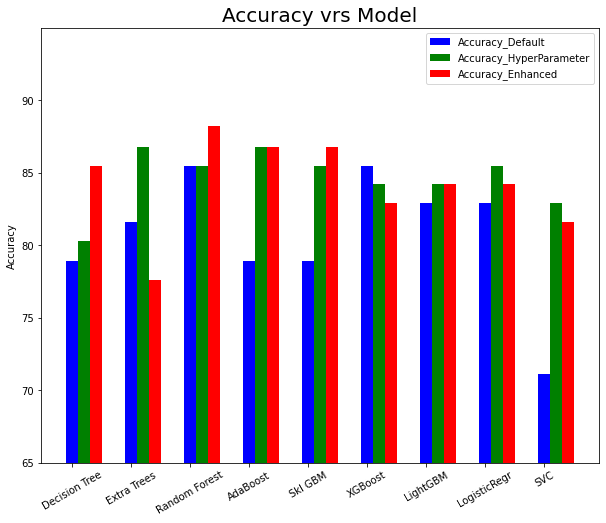

In [22]:
import matplotlib.pyplot as plt

data1 = pd.read_csv('accuracy_default_parameters')
data2 = pd.read_csv('accuracy_hyper_parameters')
data3 = pd.read_csv('accuracy_data_enhanced')


accuracy = pd.concat([data1[['Model',  'Accuracy_Default']], data2['Accuracy_HyperParameter'], data3['Accuracy_Enhanced']], axis=1)

data1 = accuracy['Accuracy_Default']
data2 = accuracy['Accuracy_HyperParameter']
data3 = accuracy['Accuracy_Enhanced']


X = np.arange(9)

# fig = plt.figure(figsize=(10, 8))

plt.figure(figsize=(10, 8))
# ax = fig.add_axes([0,0,1,1])

plt.bar(X + 0.0, data1, color = 'b', width = 0.2)
plt.bar(X + 0.2, data2, color = 'g', width = 0.2)
plt.bar(X + 0.4, data3, color = 'r', width = 0.2)

plt.ylabel('Accuracy')
plt.title('Accuracy vrs Model', fontsize=20)
plt.ylim(65, 95)
plt.xticks(X, accuracy['Model'], rotation=30)
plt.yticks(np.arange(65, 95, 5))
plt.legend(labels=['Accuracy_Default', 'Accuracy_HyperParameter', 'Accuracy_Enhanced'])

plt.savefig('zor')

print(accuracy)